In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler #padronização (trazer para distribuição normal - média 0 dp 1)
from sklearn.preprocessing import MinMaxScaler #normalização [0,1]

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

##### Carregando o dataset de características de vinhos (3 cultivares, região da Itália)

In [2]:
#https://archive.ics.uci.edu/dataset/109/wine
df_raw = pd.read_csv('datasets/wine.data')

##### Inserindo o nome das colunas a partir do site UCI

In [5]:
df_raw.columns = ['class','alcohol','malicacid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanis',
                  'color_intensity', 'hue','0d280_0d315_of_diluted_wines','proline']
"""
malicacid: ácido málico
ash: cinza/resíduo?
"""

In [7]:
df_raw.head(10)

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanis,color_intensity,hue,0d280_0d315_of_diluted_wines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
5,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
6,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
7,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
8,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
9,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510


In [8]:
df_raw.describe()

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanis,color_intensity,hue,0d280_0d315_of_diluted_wines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


##### Com esta estatística descritiva, vemos que as colunas possuem diferentes escalas (ver média, min, max). Podemos ver bem esta diferença de escala num boxplot geral

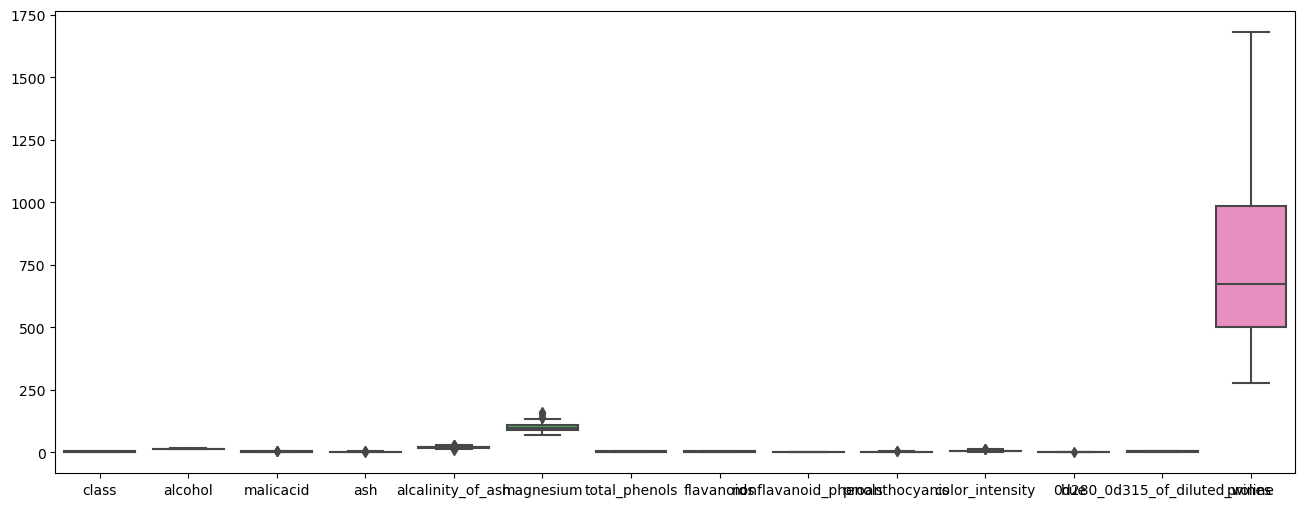

In [11]:
plt.figure(figsize=(16,6))
ax = sb.boxplot(df_raw)

##### Vamos ver como os dados ficam após padronização (distribuição normal)

In [12]:
std_scaler = StandardScaler()
df_standardized = std_scaler.fit(df_raw)

df_standardized = std_scaler.transform(df_raw)
df_standardized #agora estão com média 0 e dp 1

array([[-1.22246766,  0.2558245 , -0.50162433, ...,  0.40709978,
         1.13169801,  0.97105248],
       [-1.22246766,  0.20622873,  0.01802001, ...,  0.3195674 ,
         0.80457911,  1.40099798],
       [-1.22246766,  1.70650069, -0.34931478, ..., -0.4244579 ,
         1.20281081,  2.34050852],
       ...,
       [ 1.36887097,  0.34261709,  1.73822194, ..., -1.60614514,
        -1.48525319,  0.28632445],
       [ 1.36887097,  0.21862767,  0.22408586, ..., -1.56237895,
        -1.39991783,  0.30224836],
       [ 1.36887097,  1.40892609,  1.57695301, ..., -1.51861275,
        -1.42836295, -0.58949046]])

##### Neste momento temos um array numpy, que precisa ser passado para o método DataFrame Pandas para criar um dataframe

In [13]:
df_standardized = pd.DataFrame(df_standardized)
df_standardized.columns = ['class','alcohol','malicacid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanis',
                  'color_intensity', 'hue','0d280_0d315_of_diluted_wines','proline']

df_standardized.head(10)

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanis,color_intensity,hue,0d280_0d315_of_diluted_wines,proline
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965
5,-1.222468,1.731299,-0.420990,0.305655,-1.478055,-0.253827,0.332548,0.498632,-0.501337,0.689650,0.084214,0.275801,1.387704,1.735400
6,-1.222468,1.322133,-0.170127,0.888953,-0.576243,1.514967,0.492626,0.488590,-0.420887,-0.591214,-0.002072,0.450866,1.387704,1.751324
7,-1.222468,2.276852,-0.627056,-0.715117,-1.658418,-0.183075,0.812784,0.960557,-0.581788,0.689650,0.062643,0.538398,0.349457,0.955129
8,-1.222468,1.074155,-0.886878,-0.350556,-1.057210,-0.112323,1.100925,1.131268,-1.144940,0.461551,0.934132,0.232035,1.345036,0.955129
9,-1.222468,1.371729,-0.161168,-0.241187,-0.456001,0.382939,1.052902,1.301980,-1.144940,1.391493,0.299929,1.282424,0.804579,2.436052


##### A classe deveria ser padronizada também? Não! Mas lá na frente iremos desconsiderá-la, usando a target original
##### Vamos dar uma olhada no BOXPLOT com os dados padronizados

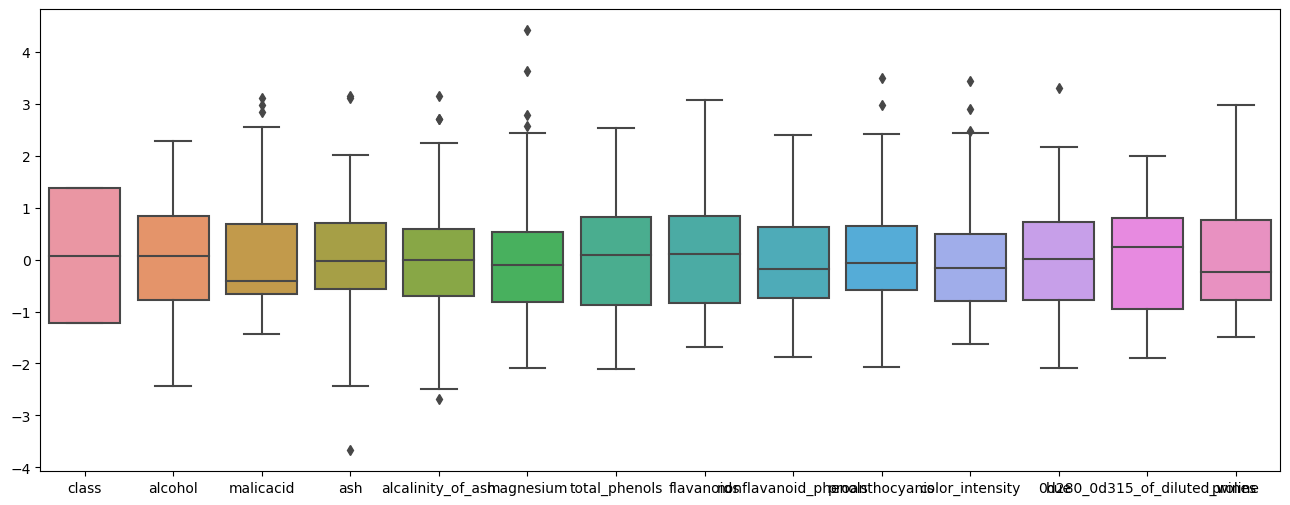

In [14]:
plt.figure(figsize=(16,6))
ax = sb.boxplot(df_standardized)

##### Agora estão em escalas coerentes. Seguindo o mesmo raciocínio, mas agora com a normalização MinMax

In [15]:
minmax_scaler = MinMaxScaler()
df_minmax = minmax_scaler.fit(df_raw)

df_minmax = minmax_scaler.transform(df_raw)
df_minmax #agora estão com valores entre 0 e 1

array([[0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       [0.        , 0.87894737, 0.23913043, ..., 0.30894309, 0.7985348 ,
        0.85734665],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

In [16]:
df_minmax = pd.DataFrame(df_minmax)
df_minmax.columns = ['class','alcohol','malicacid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanis',
                  'color_intensity', 'hue','0d280_0d315_of_diluted_wines','proline']

df_minmax.head(10)

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanis,color_intensity,hue,0d280_0d315_of_diluted_wines,proline
0,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
2,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
3,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
4,0.0,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949
5,0.0,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
6,0.0,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
7,0.0,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
8,0.0,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076
9,0.0,0.807895,0.280632,0.502674,0.381443,0.380435,0.679310,0.628692,0.169811,0.621451,0.381399,0.626016,0.695971,0.878745


In [17]:
df_minmax.describe()

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanis,color_intensity,hue,0d280_0d315_of_diluted_wines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.471751,0.516756,0.316183,0.538053,0.459637,0.321604,0.452503,0.355157,0.438333,0.371277,0.322082,0.387791,0.488752,0.333164
std,0.386996,0.212844,0.221208,0.147102,0.171962,0.154065,0.216022,0.210687,0.235194,0.180298,0.198332,0.186289,0.258279,0.224596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350000,0.169960,0.454545,0.340206,0.195652,0.262069,0.181435,0.264151,0.264984,0.164676,0.243902,0.241758,0.158345
50%,0.500000,0.531579,0.223320,0.534759,0.458763,0.304348,0.472414,0.377637,0.396226,0.359621,0.290102,0.390244,0.553114,0.281027
75%,1.000000,0.694737,0.466403,0.641711,0.561856,0.402174,0.627586,0.531646,0.584906,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Todas as colunas estão no mesmo intervalo [0,1]. Dando uma olhada no BOXPLOT, vemos que as médias e desvios são diferentes, mas pertencem ao mesmo intervalo

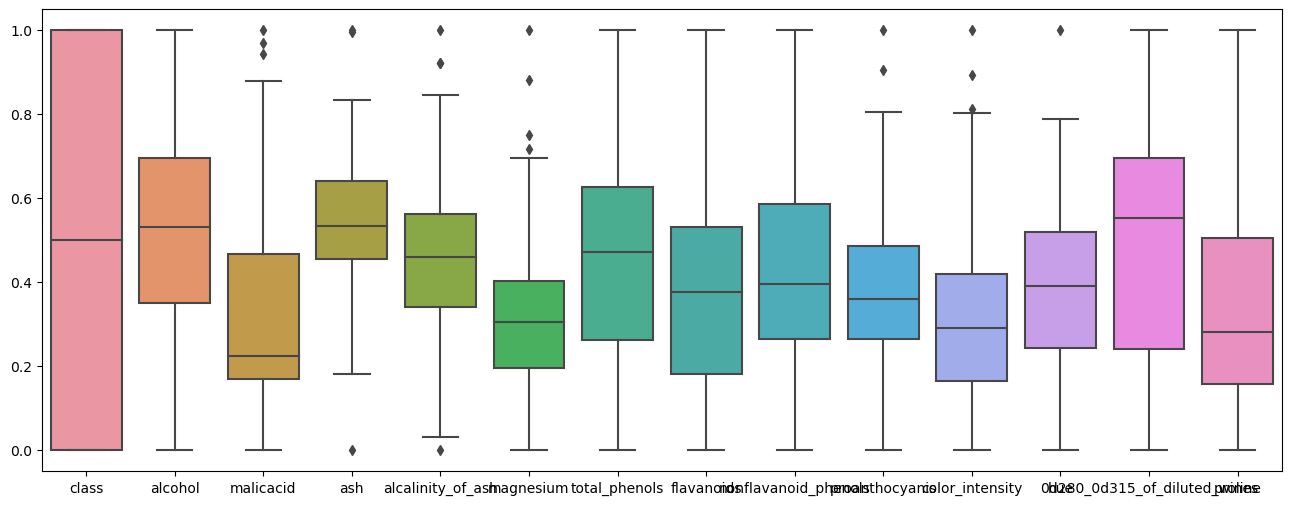

In [18]:
plt.figure(figsize=(16,6))
ax = sb.boxplot(df_minmax)

##### Comparando agora a acurácia com o df original, padronizado e normalizado min_max. Lembrando que os dados estarem na mesma escala reduz o tempo de treinamento, pois os dados estão na forma como os modelos 'esperam'

In [19]:
X_raw = df_raw.drop(columns=['class'],axis=1)
y_raw = df_raw['class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=42)

In [29]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train) # TREINO DO MODELO KNN

y_pred = knn_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

0.7037037037037037


##### Padronizado

In [30]:
X_standardized = df_standardized.drop(columns=['class'],axis=1)
y_standardized = df_raw['class']

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_standardized, test_size=0.3, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train) # TREINO DO MODELO KNN

y_pred = knn_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

0.9814814814814815


##### Normalizado

In [31]:
X_minmax = df_minmax.drop(columns=['class'],axis=1)
y_minmax = df_raw['class']

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_minmax, test_size=0.3, random_state=42)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train) # TREINO DO MODELO KNN

y_pred = knn_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

0.9444444444444444


##### Testando agora com SVM. Primeiro o original

In [32]:
X_raw = df_raw.drop(columns=['class'],axis=1)
y_raw = df_raw['class']

X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=42)

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train) # TREINO DO MODELO KNN

y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

0.9444444444444444


##### Padronizado - NÃO TRATA-SE DE APENAS VER ACURÁCIA, MAS AS ESCALAS REDUZEM A POSSIBILIDADE DE SOBREAJUSTE AOS DADOS DE TREINAMENTO (OVERFITTING) e o tempo de treinamento para bases maiores

In [33]:
X_standardized = df_standardized.drop(columns=['class'],axis=1)
y_standardized = df_raw['class']

X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_standardized, test_size=0.3, random_state=42)

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train) # TREINO DO MODELO KNN

y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

0.9259259259259259


##### Normalizado MINMAX

In [34]:
X_minmax = df_minmax.drop(columns=['class'],axis=1)
y_minmax = df_raw['class']

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y_minmax, test_size=0.3, random_state=42)

svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train) # TREINO DO MODELO KNN

y_pred = svm_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

print(acc)

0.9444444444444444


##### O SVM com kernel LINEAR aparenta ser mais robusto à escala dos dados, mas sempre recomenda-se este ajuste pelos outros fatores citados